# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

url = "http://api.openweathermap.org/data/2.5/weather?"



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cityname=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

In [4]:
units = "imperial"
set_count = 1
record_count = 0
for i, city in enumerate(cities):
    if i % 50 == 0 and i >= 50:
        set_count = set_count +1
        record_count = 1
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count = record_count +1
    query_url = f"{url}appid={weather_api_key}&units{units}&q={city}"
    post_response = requests.get(query_url).json()         
    
    try:
        cityname.append(post_response['name'])
        lat.append(post_response['coord']['lat'])
        lng.append(post_response['coord']['lon'])
        max_temp.append(post_response['main']['temp_max'])
        humidity.append(post_response['main']['humidity'])
        cloudiness.append(post_response['clouds']['all'])
        wind_speed.append(post_response['wind']['speed'])
        country.append(post_response['sys']['country'])
        date.append(time.ctime(post_response['dt']))
    except KeyError:
        print("City not found...Skipping...")
    

Processing Record 0 of Set 1 | amderma
City not found...Skipping...
Processing Record 1 of Set 1 | port hardy
Processing Record 2 of Set 1 | port augusta
Processing Record 3 of Set 1 | burica
City not found...Skipping...
Processing Record 4 of Set 1 | labutta
City not found...Skipping...
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | male
Processing Record 7 of Set 1 | registro
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | kavaratti
Processing Record 11 of Set 1 | belushya guba
City not found...Skipping...
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | margate
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | beringovskiy
Processing Record 18 of Set 1 | nome
Processing Record 19 of Set 1 | barentsburg
City not found...Skipping...
Processing Record 20 of Set 1 | 

Processing Record 35 of Set 4 | tiznit
Processing Record 36 of Set 4 | meulaboh
Processing Record 37 of Set 4 | carnarvon
Processing Record 38 of Set 4 | srednekolymsk
Processing Record 39 of Set 4 | lagoa
Processing Record 40 of Set 4 | kavieng
Processing Record 41 of Set 4 | huilong
Processing Record 42 of Set 4 | maykain
City not found...Skipping...
Processing Record 43 of Set 4 | mountain home
Processing Record 44 of Set 4 | gazanjyk
Processing Record 45 of Set 4 | lisakovsk
Processing Record 46 of Set 4 | viru
Processing Record 47 of Set 4 | isangel
Processing Record 48 of Set 4 | mount isa
Processing Record 49 of Set 4 | banjar
Processing Record 50 of Set 4 | upernavik
Processing Record 1 of Set 5 | pingliang
Processing Record 2 of Set 5 | lukow
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | licheng
Processing Record 5 of Set 5 | commerce
Processing Record 6 of Set 5 | salalah
Processing Record 7 of Set 5 | fernley
Processing Record 8 of Set 5 | cabangahan

Processing Record 25 of Set 8 | liepaja
Processing Record 26 of Set 8 | monte carmelo
Processing Record 27 of Set 8 | rawannawi
City not found...Skipping...
Processing Record 28 of Set 8 | bengkulu
Processing Record 29 of Set 8 | veraval
Processing Record 30 of Set 8 | tura
Processing Record 31 of Set 8 | prince george
Processing Record 32 of Set 8 | buariki
City not found...Skipping...
Processing Record 33 of Set 8 | oneida
Processing Record 34 of Set 8 | talnakh
Processing Record 35 of Set 8 | kahului
Processing Record 36 of Set 8 | baena
Processing Record 37 of Set 8 | sitrah
Processing Record 38 of Set 8 | goalpara
Processing Record 39 of Set 8 | xai-xai
Processing Record 40 of Set 8 | kaman
Processing Record 41 of Set 8 | erhlin
City not found...Skipping...
Processing Record 42 of Set 8 | hobyo
Processing Record 43 of Set 8 | rio gallegos
Processing Record 44 of Set 8 | tuatapere
Processing Record 45 of Set 8 | bilibino
Processing Record 46 of Set 8 | haifa
Processing Record 47 of

Processing Record 12 of Set 12 | warqla
City not found...Skipping...
Processing Record 13 of Set 12 | wattegama
Processing Record 14 of Set 12 | plettenberg bay
Processing Record 15 of Set 12 | vizimyary
City not found...Skipping...
Processing Record 16 of Set 12 | brownsville
Processing Record 17 of Set 12 | sun city west
Processing Record 18 of Set 12 | lukavica
Processing Record 19 of Set 12 | sur
Processing Record 20 of Set 12 | cap malheureux
Processing Record 21 of Set 12 | ancud
Processing Record 22 of Set 12 | wairoa
Processing Record 23 of Set 12 | padang
Processing Record 24 of Set 12 | sucua
Processing Record 25 of Set 12 | mozarlandia
Processing Record 26 of Set 12 | correntina
Processing Record 27 of Set 12 | oshkosh
Processing Record 28 of Set 12 | biak
Processing Record 29 of Set 12 | lompoc
Processing Record 30 of Set 12 | coahuayana
Processing Record 31 of Set 12 | tingrela
City not found...Skipping...
Processing Record 32 of Set 12 | tual
Processing Record 33 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dt ={"City":cityname,"Lat":lat,"Lng":lng,"Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
             "Wind Speed":wind_speed,"Country":country,"Date":date}
weather_df =pd.DataFrame(weather_dt)
weather_df.to_csv('output_data/cities.csv')
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Hardy,50.6996,-127.4199,285.15,71,40,3.60,CA,Tue May 4 14:38:47 2021
1,Port Augusta,-32.5000,137.7667,285.15,66,3,5.14,AU,Tue May 4 14:38:48 2021
2,Hermanus,-34.4187,19.2345,292.04,82,18,1.79,ZA,Tue May 4 14:38:48 2021
3,Malé,4.1748,73.5089,302.15,84,75,1.03,MV,Tue May 4 14:38:49 2021
4,Registro,-24.4875,-47.8436,301.63,52,8,0.93,BR,Tue May 4 14:38:49 2021


In [6]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,20.397903,20.598786,290.205967,67.373606,50.020446,3.401543
std,33.404410,91.414043,11.064495,23.407328,40.376320,2.319767
min,-54.800000,-175.200000,260.980000,2.000000,0.000000,0.050000
25%,-8.168250,-59.616675,282.150000,53.000000,6.000000,1.692500
50%,25.320700,26.185200,291.210000,72.000000,40.000000,2.950000
75%,48.433525,98.699975,299.187500,87.000000,92.750000,4.630000
max,78.218600,179.316700,312.040000,100.000000,100.000000,14.920000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

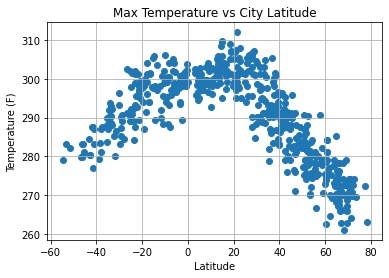

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

plt.title("Max Temperature vs City Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/MaxTemperaturevsCityLatitude.png")

plt.show()

The above graph is showing the cities maxium temperature in relation to the cities latitude.

## Latitude vs. Humidity Plot

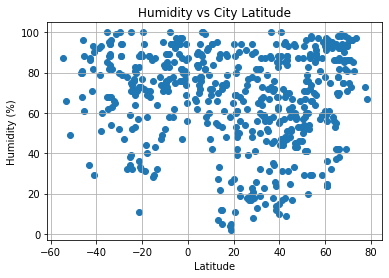

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

plt.title("Humidity vs City Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/HumidityvsCityLatitude.png")

plt.show()

The above graph is showing the cities humidity in relation to the cities latitude.

## Latitude vs. Cloudiness Plot

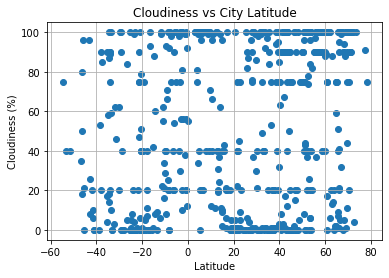

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

plt.title("Cloudiness vs City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/CloudinessvsCityLatitude.png")

plt.show()

The above graph is showing the cities cloudiness in relation to the cities latitude.

## Latitude vs. Wind Speed Plot

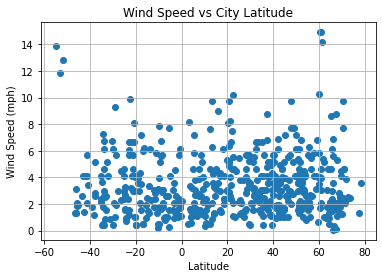

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

plt.title("Wind Speed vs City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/WindSpeedvsCityLatitude.png")

plt.show()

The above graph is showing the cities wind speed in relation to the cities latitude.

## Linear Regression

In [13]:
north_weather =weather_df.loc[weather_df["Lat"] >= 0]

south_weather =weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather["Lat"], north_weather["Max Temp"])

regress_values = north_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = -0.54x +309.76'

The r-value is: 0.7724252972910807


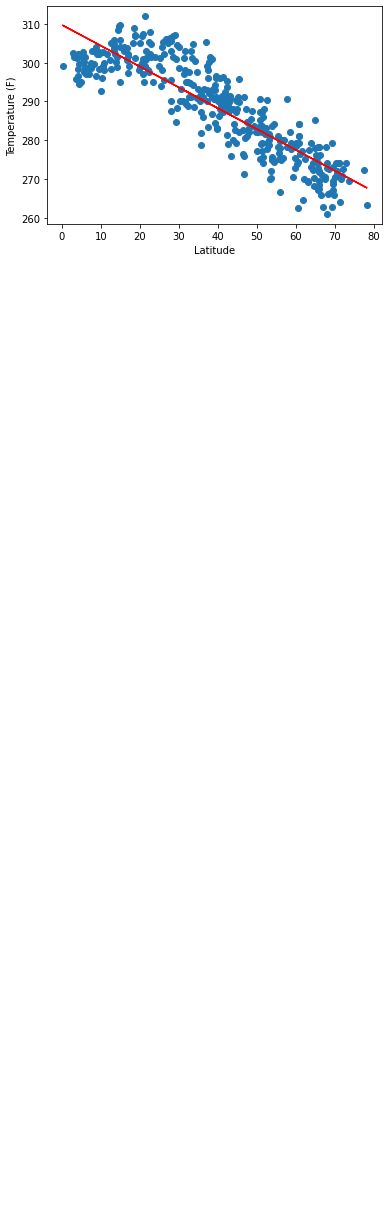

In [15]:
plt.scatter(north_weather["Lat"],north_weather["Max Temp"])
plt.plot(north_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/NMaxTempvsLatitude.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather["Lat"], south_weather["Max Temp"])

regress_values = south_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = 0.4x +302.22'

The r-value is: 0.5910961901364139


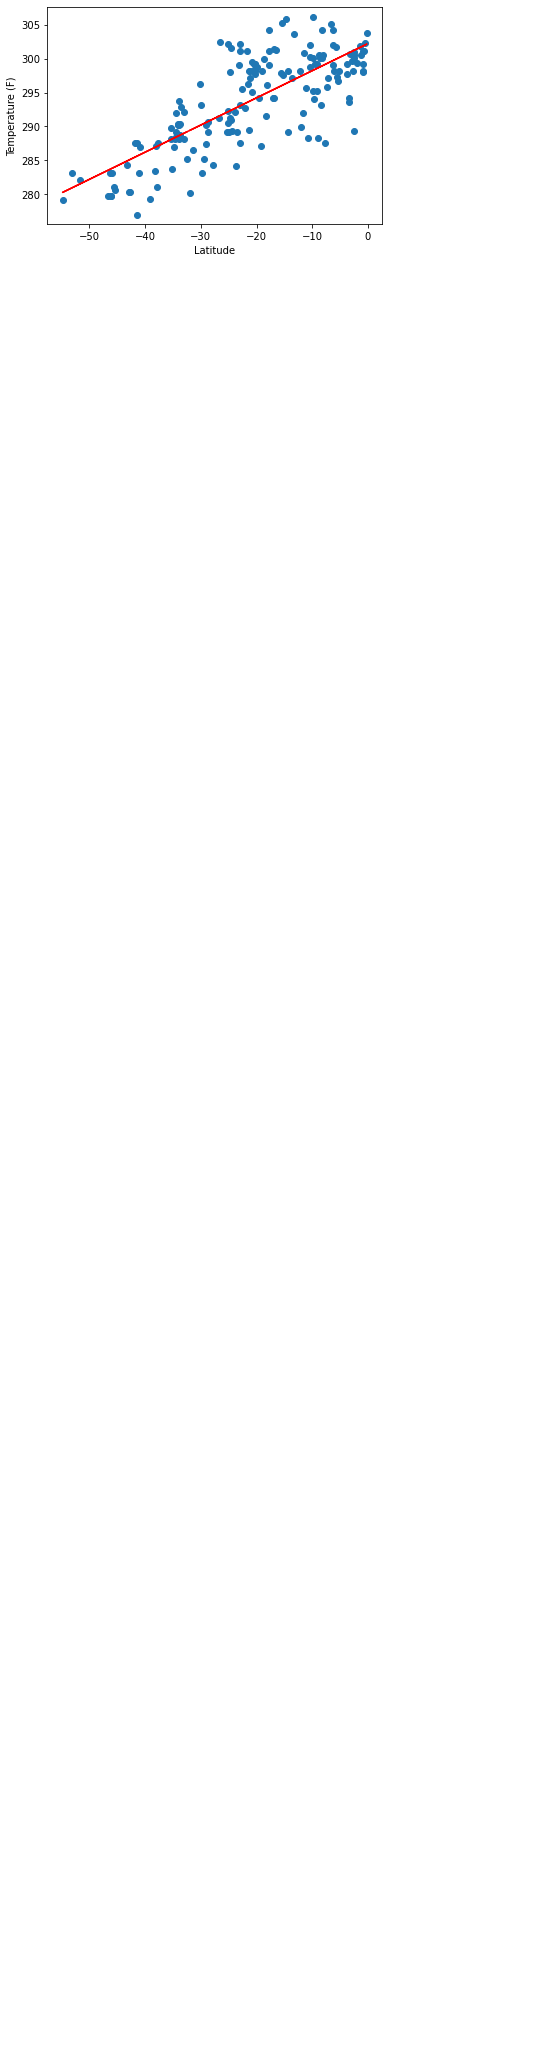

In [17]:
plt.scatter(south_weather["Lat"],south_weather["Max Temp"])
plt.plot(south_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/SMaxTempvsLatitude.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather["Lat"], north_weather["Humidity"])

regress_values = north_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = 0.18x +57.27'

The r-value is: 0.02157224332941396


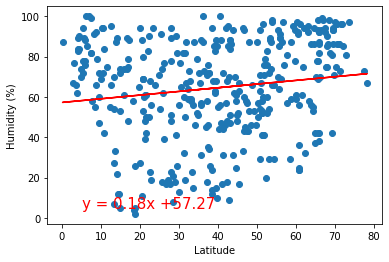

In [19]:
plt.scatter(north_weather["Lat"],north_weather["Humidity"])
plt.plot(north_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/NHumidityvsLatitude.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather["Lat"], south_weather["Humidity"])

regress_values = south_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = 0.07x +75.36'

The r-value is: 0.0027730885794397565


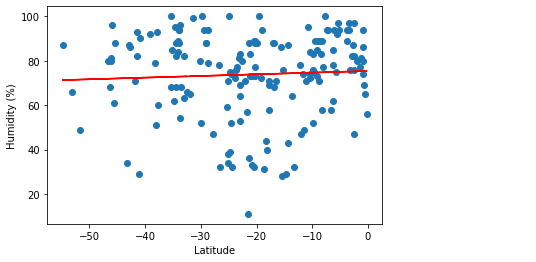

In [21]:
plt.scatter(south_weather["Lat"],south_weather["Humidity"])
plt.plot(south_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/SHumidityvsLatitude.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather["Lat"], north_weather["Cloudiness"])

regress_values = north_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = 0.22x +44.86'

The r-value is: 0.011033244205802852


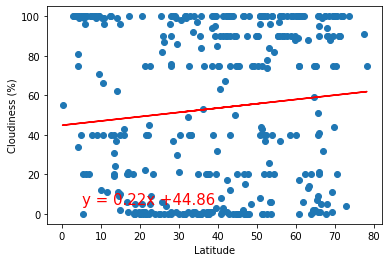

In [23]:
plt.scatter(north_weather["Lat"],north_weather["Cloudiness"])
plt.plot(north_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/NCloudinessvsLatitude.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather["Lat"], south_weather["Cloudiness"])

regress_values = south_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = 0.43x +51.66'

The r-value is: 0.02354106442902918


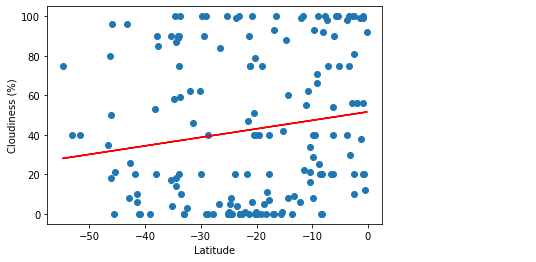

In [25]:
plt.scatter(south_weather["Lat"],south_weather["Cloudiness"])
plt.plot(south_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/SCloudinessvsLatitude.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather["Lat"], north_weather["Wind Speed"])

regress_values = north_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = 0.0x +3.35'

The r-value is: 0.001274071583443702


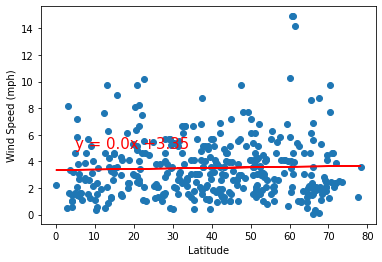

In [27]:
plt.scatter(north_weather["Lat"],north_weather["Wind Speed"])
plt.plot(north_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/NWindSpeedvsLatitude.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather["Lat"], south_weather["Wind Speed"])

regress_values = south_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = -0.04x +2.3'

The r-value is: 0.0524011268611873


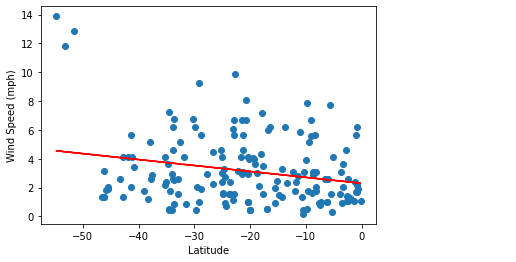

In [29]:
plt.scatter(south_weather["Lat"],south_weather["Wind Speed"])
plt.plot(south_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/SWindSpeedvsLatitude.png")

plt.show()